In [10]:
import numpy as np
import pylab as mplot
import scipy
%pylab inline
from scipy.optimize import curve_fit

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [43]:
X = np.array([-0.01835979, -0.0096447,  -0.00617025, -0.0036606,  -0.00162517,  0.0001309,\
  0.00167529,  0.00310776,  0.00445485,  0.00575323,  0.00700131,  0.00825014,\
  0.00944985,  0.01049869,  0.01341847,  0.01449595,  0.01598091,  0.01749425,\
  0.01897296,  0.02142768,  0.02441748,  0.02823412,  0.03782133])
Y = np.array([ 8.59968281e-04,  5.46798101e-04,  7.94003693e-04,  7.84480329e-04,\
  1.11558235e-03,  2.45729966e-04,  9.08785665e-04,  2.15859681e-04,\
  3.39127274e-04,  4.35010773e-04,  1.14251756e-04,  1.16951409e-04,\
 -1.92219213e-04,  3.71934171e-04, -4.43551580e-05, -3.80527326e-04,\
 -6.89618142e-05, -2.93473685e-04, -2.78560049e-04,-3.62694314e-04,\
 -3.29810668e-05, -1.93208144e-04, -5.88333614e-04])
Yerr = np.array([0.00025972, 0.0002751,  0.00026757, 0.00026946, 0.00026435, 0.00026745,\
 0.00026785, 0.00026563, 0.00026875, 0.00026437, 0.00027144, 0.00025983,\
 0.00028233, 0.00029794, 0.00013913, 0.00031751, 0.00023325, 0.00034564,\
 0.00025902, 0.00023637, 0.00027549, 0.00027012, 0.00027696])

In [44]:
def line(slp,vrbl,intcpt):
    return slp * vrbl + intcpt

In [45]:
popt, cov = curve_fit(line, X, Y, sigma=Yerr)
m= popt[0]
c=popt[1]
print(m,c, cov)

-0.03123719983321238 0.0004621422071175737 [[ 1.78858112e-05 -1.64553631e-07]
 [-1.64553631e-07  4.12749044e-09]]


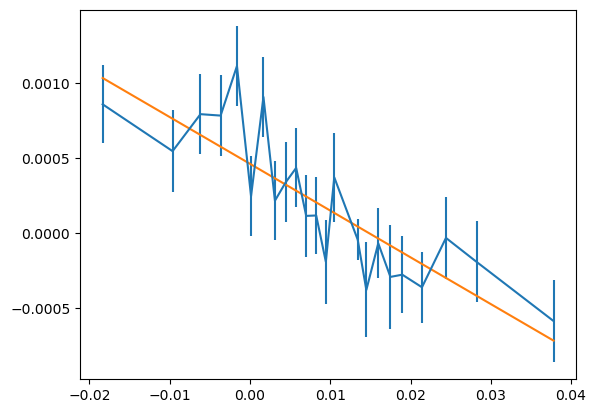

In [46]:
mplot.errorbar(X, Y, Yerr)
mplot.plot(X, X*m+c)

In [47]:
print(m, cov[0,0]**0.5)
print(c, cov[1,1]**0.5)

-0.03123719983321238 0.004229162001466997
0.0004621422071175737 6.424554799645559e-05


In [50]:
from scipy.odr import ODR, Model, RealData, unilinear
from scipy.stats import linregress
from scipy.optimize import curve_fit
import numpy as np


def fit_straight_line(
    x, y, x_err=None, y_err=None, m0=1.0, c0=0.0, nan_error=False, skip_nan=False):
    """
    Use scipy to fit a straight line, with errors or covariances allowed
    on both x and y.

    Parameters
    ----------
    x: array
        x-coordinate
    y: array
        y-coordinate
    m0: float
        optional, default=1, guess at gradient
    c0: float
        optional, default=1, guess at intercept
    x_err: array/float
        optional, default=None, errors either 1D std. dev., 2D covariance, or scalar constant, or None for unspecified
    y_err: array/float
        optional, default=None, errors either 1D std. dev., 2D covariance, or scalar constant, or None for unspecified


    Returns
    -------
    m: float
        gradient

    c: float
        intercept
    """
    #np.savetxt('x',x)
    #np.savetxt('y',y)
    
    kwargs = {}
    nx = np.ndim(x_err)

    if skip_nan:
        w = np.isfinite(x) & np.isfinite(y)
        x = x[w]
        #print("x: ",x)
        y = y[w]
        #print("y: ",y)
    else:
        w = slice(None)

    if x_err is None:
        pass
    elif nx == 0:
        kwargs["sx"] = x_err
    elif nx == 1:
        kwargs["sx"] = x_err[w]
    elif nx == 2:
        kwargs["cov_x"] = x_err[w][:, w]
    else:
        raise ValueError("x_sigma_or_cov must be None, scalar, 1D, or 2D")

    ny = np.ndim(y_err)
    #print("ny: ", ny)
    
    if y_err is None:
        pass
    elif ny == 0:
        kwargs["sy"] = y_err
    elif ny == 1:
        kwargs["sy"] = y_err[w]
    elif nx == 2:
        kwargs["cov_y"] = y_err[w][:, w]
    else:
        raise ValueError("x_sigma_or_cov must be None, scalar, 1D, or 2D")

    print("xshape:",np.shape(x))
    print(x)
    print("yshape:",np.shape(y))
    print(y)
    print("yerrshape:",np.shape(y_err))
    print(y_err)

    popt, cov = curve_fit(line, x, y, sigma=y_err)
    m= popt[0]
    c=popt[1]
    return m,c, cov

def line(slp,vrbl,intcpt):
    return slp * vrbl + intcpt
    


In [51]:
fit_straight_line(X, Y, x_err=None, y_err=Yerr, m0=1.0, c0=0.0, nan_error=False, skip_nan=True)

xshape: (23,)
[-0.01835979 -0.0096447  -0.00617025 -0.0036606  -0.00162517  0.0001309
  0.00167529  0.00310776  0.00445485  0.00575323  0.00700131  0.00825014
  0.00944985  0.01049869  0.01341847  0.01449595  0.01598091  0.01749425
  0.01897296  0.02142768  0.02441748  0.02823412  0.03782133]
yshape: (23,)
[ 8.59968281e-04  5.46798101e-04  7.94003693e-04  7.84480329e-04
  1.11558235e-03  2.45729966e-04  9.08785665e-04  2.15859681e-04
  3.39127274e-04  4.35010773e-04  1.14251756e-04  1.16951409e-04
 -1.92219213e-04  3.71934171e-04 -4.43551580e-05 -3.80527326e-04
 -6.89618142e-05 -2.93473685e-04 -2.78560049e-04 -3.62694314e-04
 -3.29810668e-05 -1.93208144e-04 -5.88333614e-04]
yerrshape: (23,)
[0.00025972 0.0002751  0.00026757 0.00026946 0.00026435 0.00026745
 0.00026785 0.00026563 0.00026875 0.00026437 0.00027144 0.00025983
 0.00028233 0.00029794 0.00013913 0.00031751 0.00023325 0.00034564
 0.00025902 0.00023637 0.00027549 0.00027012 0.00027696]


(-0.03123719983321238,
 0.0004621422071175737,
 array([[ 1.78858112e-05, -1.64553631e-07],
        [-1.64553631e-07,  4.12749044e-09]]))